In [21]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pathlib
import PIL


In [22]:
dataset_url = "C:/Users/cammi/Downloads/gunModel/"
#data_dir = tf.keras.utils.get_file('test', origin=dataset_url, untar=False)
data_dir = pathlib.Path(dataset_url)
print(data_dir)

C:\Users\cammi\Downloads\gunModel


In [23]:
img_count =  len(list(data_dir.glob('*/*.jpg')))
print(img_count)

159716


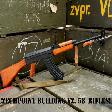

In [24]:
guns = list(data_dir.glob('gun/*'))
PIL.Image.open(str(guns[0]))


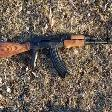

In [25]:
PIL.Image.open(str(guns[1]))


In [26]:
batch_size = 100
img_height = 112
img_width = 112

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 159716 files belonging to 2 classes.
Using 127773 files for training.


In [28]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 159716 files belonging to 2 classes.
Using 31943 files for validation.


In [29]:
class_names = train_ds.class_names
print(class_names)

['gun', 'no gun']


In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
#Tuning for performance

In [31]:
num_classes = len(class_names)

In [32]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [14]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(96, 4, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    
    tf.keras.layers.Dense(num_classes)
])
#models from paper 2

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=500
)

Epoch 1/3
1278/1278 [==============================] - 426s 297ms/step - loss: 0.2786 - accuracy: 0.8856 - val_loss: 0.2272 - val_accuracy: 0.9125
Epoch 2/3
1278/1278 [==============================] - 330s 258ms/step - loss: 0.1942 - accuracy: 0.9254 - val_loss: 0.1887 - val_accuracy: 0.9276
Epoch 3/3
1278/1278 [==============================] - 325s 254ms/step - loss: 0.1582 - accuracy: 0.9405 - val_loss: 0.1703 - val_accuracy: 0.9334


In [37]:
loss,acc = model.evaluate(val_ds, verbose=0)
print(f'loss: {loss}')
print(f'model acc = {100*acc}')

loss: 0.17025288939476013
model acc = 93.34439635276794


In [ ]:
# model2.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [ ]:
# epochs=10
# history = model2.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs)
#dont run untill No gun is added, will take atleast 15 mins to train for 10 epochs

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'sub_42' defined at (most recent call last):
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\cammi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\cammi\AppData\Local\Temp\ipykernel_20052\2363947558.py", line 2, in <module>
      history = model2.fit(
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 1213, in apply_grad_to_update_var
      return self._update_step(grad, var)
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 224, in _update_step
      self.update_step(gradient, variable)
    File "c:\Users\cammi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_experimental\adam.py", line 194, in update_step
      m.assign_add((gradient - m) * (1 - self.beta_1))
Node: 'sub_42'
OOM when allocating tensor with shape[200704,4096] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node sub_42}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_7701]

In [ ]:
# loss,acc = model2.evaluate(val_ds, verbose=0)
# print(f'loss: {loss}')
# print(f'model acc = {100*acc}')

In [38]:
model.save('model1_inc.h5')